## Car Price Prediction
###  Road Map
- 1. Task
- 2. Data
- 3. Modelling
- 4. Error Measurement
- 5. Training and optimization
- 6. Performance Measurement
- 7. Validation and Testing
- 8. Corrective Measure

### Task
- predict the price of task oon the basis of given features

In [1]:
## loading datset and importing a libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense,InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv("./dataset/train.csv")
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [3]:
df.shape

(1000, 12)

### Data Preparation 

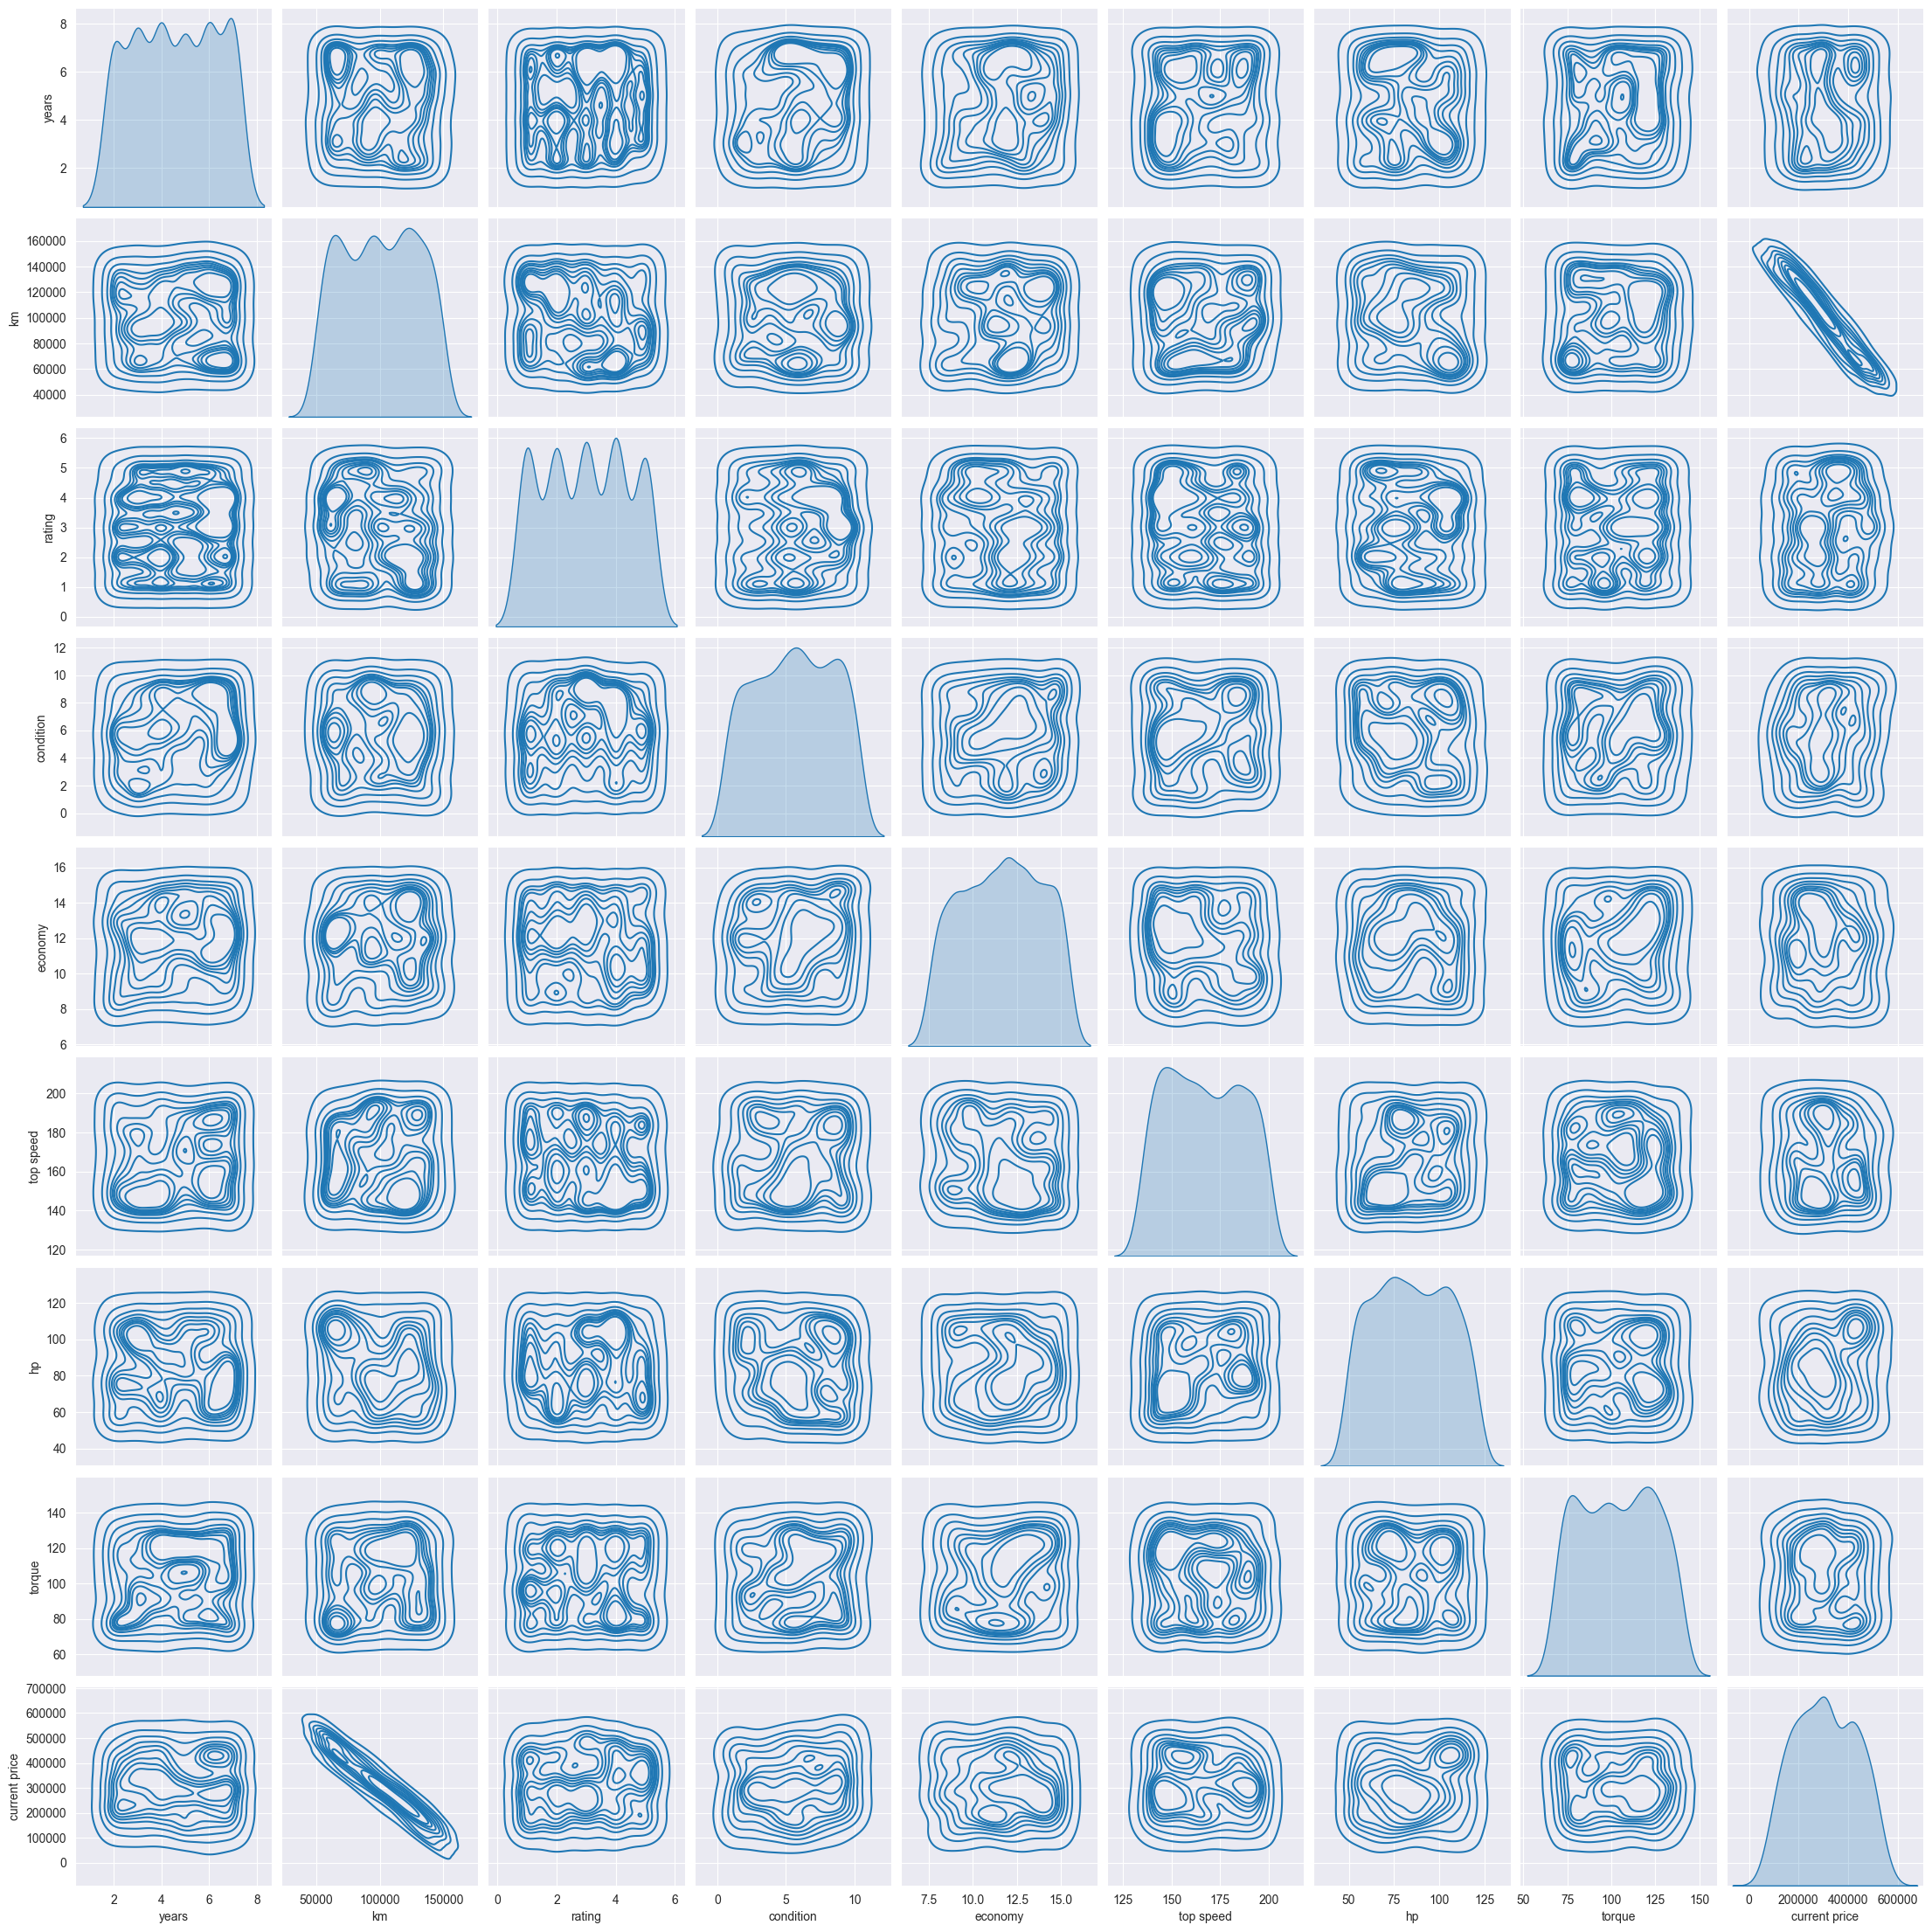

In [4]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='kde')

In [5]:
tensorData=tf.constant(df)
tensor_data=tf.cast(tensorData,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [6]:
## Do shuffling to make sure there is no bias
tensor_data=tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[9.130000e+02, 6.888320e+05, 8.745700e+05, 6.000000e+00,
        1.044270e+05, 4.000000e+00, 5.000000e+00, 1.300000e+01,
        1.590000e+02, 5.700000e+01, 1.250000e+02, 3.624345e+05],
       [2.050000e+02, 5.236370e+05, 8.160840e+05, 7.000000e+00,
        1.270420e+05, 5.000000e+00, 6.000000e+00, 1.100000e+01,
        1.350000e+02, 8.600000e+01, 8.200000e+01, 1.589515e+05],
       [5.650000e+02, 6.661760e+05, 8.670260e+05, 4.000000e+00,
        9.886700e+04, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.960000e+02, 5.900000e+01, 1.210000e+02, 3.873215e+05],
       [6.700000e+02, 6.376910e+05, 7.176520e+05, 2.000000e+00,
        9.888000e+04, 2.000000e+00, 3.000000e+00, 1.100000e+01,
        1.950000e+02, 6.000000e+01, 7.100000e+01, 2.824965e+05],
       [6.230000e+02, 5.988760e+05, 8.191610e+05, 6.000000e+00,
        1.006300e+05, 3.000000e+00, 9.000000e+00, 8.000000e+00,
        1.660000e+02, 7.600000e+01, 1.380000e+02, 3

In [7]:
df.head(2)

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5

In [8]:
X=tensor_data[:,3:-1]
Y=tensor_data[:,-1]

In [9]:
print(X.shape)
print(Y.shape)

(1000, 8)
(1000,)


In [10]:
Y=tf.expand_dims(Y,axis=-1)

## Perform Normalization
The normalized data is then used to train the model. The normalization process is done using the following formula 
(x-meu)/variance      :-standard deviation^2 = variance

In [11]:
# sample example
normalizer=Normalization()
x_normalizer=tf.constant([2,3,4,5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 3., 4., 5.], dtype=float32)>

In [12]:
# sample example
normalizer = Normalization(mean=3, variance=2)
x_normalizer = tf.constant([2, 3, 4, 5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.70710677,  0.        ,  0.70710677,  1.4142135 ], dtype=float32)>

In [13]:
# sample example
normalizer = Normalization(axis=-1, mean=3, variance=2)
x_normalizer = tf.constant([[2, 3, 4, 5],[7,8,9,10]])
normalizer(x_normalizer)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.70710677,  0.        ,  0.70710677,  1.4142135 ],
       [ 2.828427  ,  3.535534  ,  4.242641  ,  4.9497476 ]],
      dtype=float32)>

In [14]:
# Adapt normalizer to data without mean and variance it calculate for us
normalizer=Normalization()
normalizer.adapt(X) 

## Using Linear Regression Model

### Different ways to create model in tensorflow
- Sequential
- Functional
- Subclassing methods

In [15]:
model=tf.keras.Sequential([normalizer,
                           Dense(1)])  #we  have only one output price that is why we use 1 in dense
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (1000, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

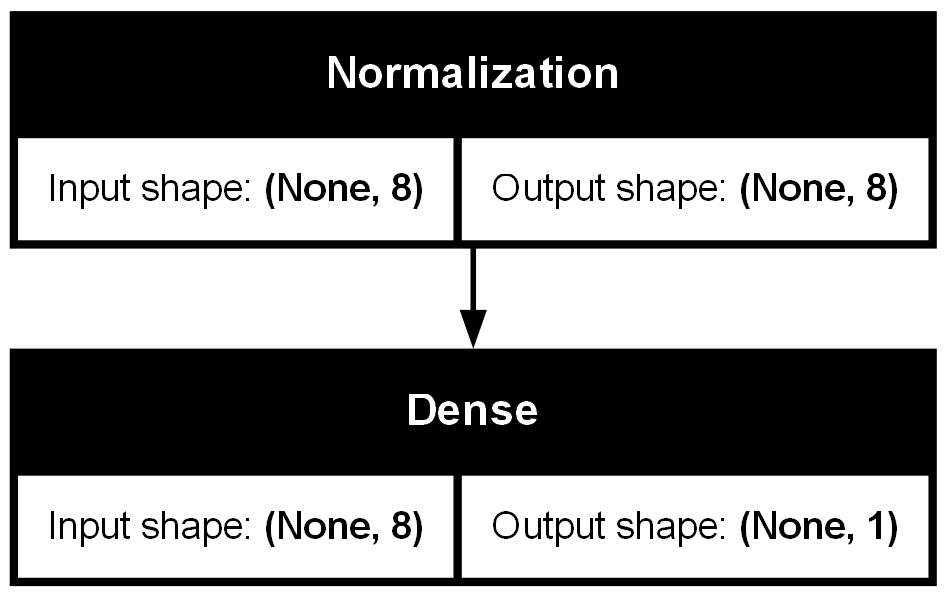

In [16]:

# Define the normalizer and adapt it to the input features
normalizer = Normalization()
normalizer.adapt(X)

# Define the model with explicit input shape
model = tf.keras.Sequential([
    # Explicitly define input shape
    tf.keras.layers.Input(shape=(X.shape[1],)),
    normalizer,
    Dense(1)  # Single output neuron
])

# Print model summary
model.summary()

# Now, plot the model
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

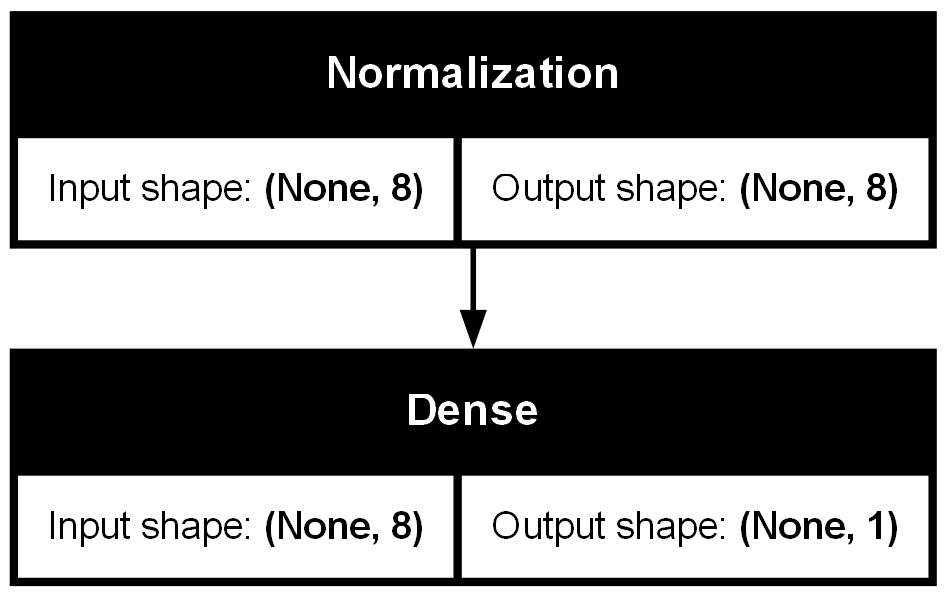

In [17]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [18]:
mse=tf.keras.losses.MeanSquaredError()# Mean Squared Error


In [19]:
huber=tf.keras.losses.Huber() # Huber Loss

In [20]:
mae=tf.keras.losses.MeanAbsoluteError() # Mean Absolute Error

In [21]:
model.compile(optimizer=Adam(learning_rate=1.0), loss='mae')

In [22]:
history=model.fit(X,Y,epochs=600,verbose=1)

Epoch 1/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 309892.5625
Epoch 2/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308597.4062 
Epoch 3/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312219.1875
Epoch 4/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307309.7812
Epoch 5/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302672.2812 
Epoch 6/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307638.4688 
Epoch 7/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301948.3125
Epoch 8/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 310585.2500
Epoch 9/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315873.6250
Epoch 10/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 307388.7812
Epoch 11/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 311259.0312
Epoch 12/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 313632.9062
Epoch 13/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 311796.9375
Epoch 14/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 311860.531

In [23]:
history.history.values()

dict_values([[308505.6875, 308473.5625, 308441.5, 308409.46875, 308377.5, 308345.75, 308313.5625, 308281.5625, 308249.59375, 308217.46875, 308185.40625, 308153.4375, 308121.4375, 308089.9375, 308057.3125, 308025.46875, 307993.5, 307961.5625, 307929.5625, 307897.5, 307865.4375, 307833.75, 307801.53125, 307769.5625, 307737.46875, 307705.5, 307673.46875, 307641.34375, 307609.53125, 307577.59375, 307545.5, 307513.59375, 307481.5625, 307449.375, 307417.34375, 307385.5, 307353.875, 307321.59375, 307289.46875, 307257.75, 307225.5, 307193.65625, 307161.4375, 307129.4375, 307097.5625, 307065.46875, 307033.28125, 307001.4375, 306969.40625, 306937.6875, 306905.4375, 306873.46875, 306841.75, 306809.5, 306777.46875, 306745.53125, 306713.4375, 306681.34375, 306649.5, 306617.375, 306585.34375, 306553.5625, 306521.34375, 306489.46875, 306457.59375, 306425.46875, 306393.46875, 306361.34375, 306329.5, 306297.5, 306265.5, 306233.59375, 306201.53125, 306169.46875, 306137.625, 306105.4375, 306073.625, 3060

In [24]:
history.history

{'loss': [308505.6875,
  308473.5625,
  308441.5,
  308409.46875,
  308377.5,
  308345.75,
  308313.5625,
  308281.5625,
  308249.59375,
  308217.46875,
  308185.40625,
  308153.4375,
  308121.4375,
  308089.9375,
  308057.3125,
  308025.46875,
  307993.5,
  307961.5625,
  307929.5625,
  307897.5,
  307865.4375,
  307833.75,
  307801.53125,
  307769.5625,
  307737.46875,
  307705.5,
  307673.46875,
  307641.34375,
  307609.53125,
  307577.59375,
  307545.5,
  307513.59375,
  307481.5625,
  307449.375,
  307417.34375,
  307385.5,
  307353.875,
  307321.59375,
  307289.46875,
  307257.75,
  307225.5,
  307193.65625,
  307161.4375,
  307129.4375,
  307097.5625,
  307065.46875,
  307033.28125,
  307001.4375,
  306969.40625,
  306937.6875,
  306905.4375,
  306873.46875,
  306841.75,
  306809.5,
  306777.46875,
  306745.53125,
  306713.4375,
  306681.34375,
  306649.5,
  306617.375,
  306585.34375,
  306553.5625,
  306521.34375,
  306489.46875,
  306457.59375,
  306425.46875,
  306393.46875,

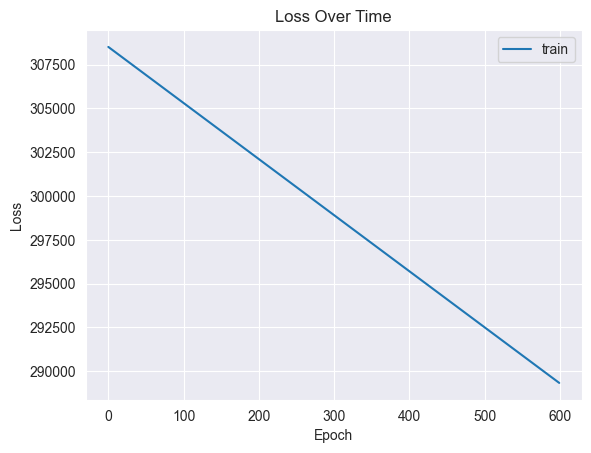

In [25]:
plt.plot(history.history['loss'])
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train'])
plt.show()

## Performance Measurement

In [26]:
model.compile(optimizer=Adam(learning_rate=1.0),
              loss='mae',
              metrics=[RootMeanSquaredError()])

In [ ]:
history = model.fit(X,Y,epochs=600,verbose=1)

Epoch 1/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 293766.0938 - root_mean_squared_error: 319828.4062
Epoch 2/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 292591.2188 - root_mean_squared_error: 318424.1250
Epoch 3/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 284164.6250 - root_mean_squared_error: 311318.3125
Epoch 4/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 284921.5938 - root_mean_squared_error: 310688.9688
Epoch 5/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 280874.2500 - root_mean_squared_error: 307271.4375
Epoch 6/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 287765.4688 - root_mean_squared_error: 313940.5312
Epoch 7/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 287625.4688 - root_mean_squared_error: 313849.7812
Epoch 8/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 294735.2500 - root_mean_squared_error: 319747.5000
Epoch 9/600
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 293516.0000 - root_mean_squared_error: 318760.9062
Epoch 10/6

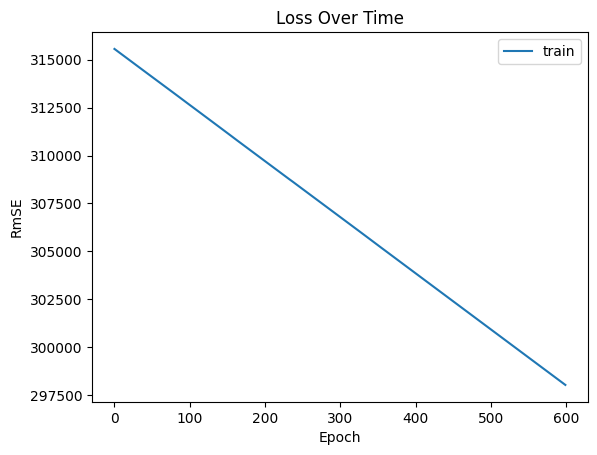

In [28]:
plt.plot(history.history['root_mean_squared_error'])
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('RmSE')
plt.legend(['train'])
plt.show()

### Model Evaluation

In [29]:
model.evaluate(X,Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 270405.8125 - root_mean_squared_error: 298672.5000 


[270144.9375, 298012.6875]

## Validation and Testing

In [30]:
trainRatio=0.8
valratio=0.1
testRatio=0.1
DataSize=len(X)

In [31]:
normalizer=Normalization()
normalizer.adapt(X)
normalizered_X=normalizer(X)[:5]

In [34]:
x_train, y_train = X[:int(DataSize*trainRatio)], Y[:int(DataSize*trainRatio)]
print(x_train.shape, y_train.shape)

(800, 8) (800, 1)


In [36]:
x_val, y_val = X[int(DataSize*trainRatio):int(DataSize*(trainRatio+valratio))
                 ], Y[int(DataSize*trainRatio):int(DataSize*(trainRatio+valratio))]
print(x_val.shape, y_val.shape)

(100, 8) (100, 1)


In [39]:
x_test, y_test = X[int(DataSize*(trainRatio+valratio)):],Y[int(DataSize*(trainRatio+valratio)):]
print(x_test.shape, y_test.shape)

(100, 8) (100, 1)


In [40]:
normalizer = Normalization()
normalizer.adapt(x_train)

In [41]:
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 266186.1875 - root_mean_squared_error: 294691.8750 - val_loss: 280348.9062 - val_root_mean_squared_error: 309930.3750
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 267429.5312 - root_mean_squared_error: 295356.3750 - val_loss: 280324.9375 - val_root_mean_squared_error: 309909.7188
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 266710.6250 - root_mean_squared_error: 294892.8125 - val_loss: 280301.4688 - val_root_mean_squared_error: 309890.3750
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 266808.8125 - root_mean_squared_error: 294906.0312 - val_loss: 280277.6250 - val_root_mean_squared_error: 309870.4062
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 269711.1875 - root_mean_squared_error: 298807.4062 - val_loss: 280252.7500 - val_root_mean_squared_error: 309848.7188
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 267634.6875 - root_mean_squared_error: 295637.5312 - va

In [42]:
history.history

{'loss': [267190.46875,
  267165.03125,
  267139.875,
  267114.6875,
  267089.34375,
  267063.96875,
  267038.71875,
  267013.375,
  266988.125,
  266962.6875,
  266937.4375,
  266912.03125,
  266886.75,
  266861.59375,
  266836.25,
  266811.0625,
  266785.5625,
  266760.9375,
  266735.09375,
  266709.71875,
  266684.5,
  266659.1875,
  266633.96875,
  266608.375,
  266583.34375,
  266557.875,
  266532.5,
  266507.25,
  266481.90625,
  266456.59375,
  266431.375,
  266406.09375,
  266380.78125,
  266355.625,
  266330.1875,
  266304.75,
  266279.46875,
  266254.1875,
  266228.875,
  266203.625,
  266178.25,
  266153.03125,
  266127.53125,
  266102.1875,
  266076.90625,
  266051.59375,
  266026.3125,
  266000.96875,
  265975.71875,
  265950.53125,
  265925.15625,
  265899.84375,
  265874.46875,
  265848.96875,
  265823.78125,
  265798.46875,
  265773.3125,
  265747.90625,
  265722.53125,
  265697.3125,
  265671.875,
  265646.59375,
  265621.125,
  265595.875,
  265570.625,
  265545.46875

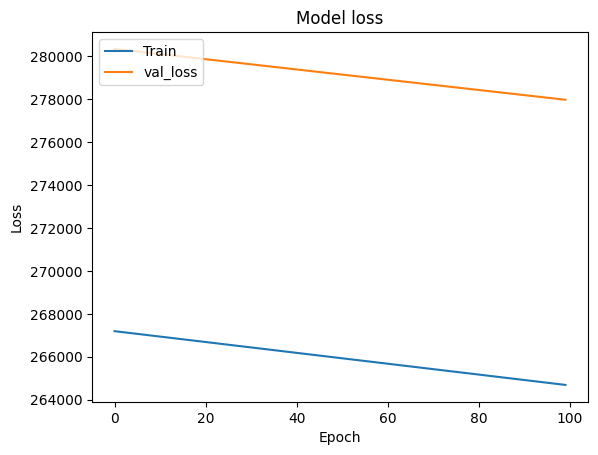

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_loss'], loc='upper left')
plt.show()

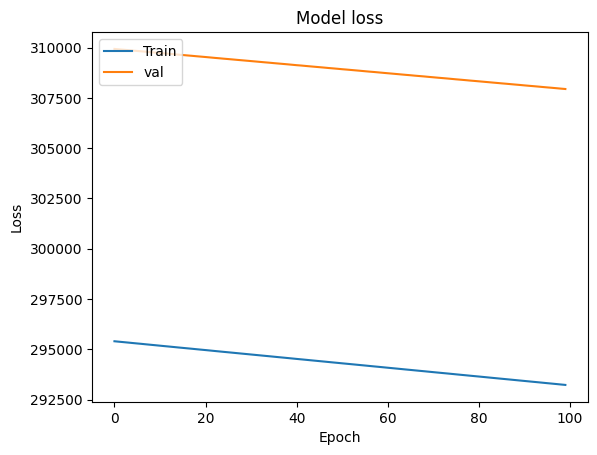

In [46]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [48]:
model.evaluate(x_val, y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 279135.0312 - root_mean_squared_error: 309541.2500


[277978.9375, 307937.71875]

In [49]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 281231.9062 - root_mean_squared_error: 305003.2812


[281162.8125, 304455.125]

##   Testing our model

In [50]:
x_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[40459.68 ],
       [41144.19 ],
       [40533.27 ],
       [42574.82 ],
       [40027.14 ],
       [39565.707],
       [39491.57 ],
       [40200.215],
       [39971.676],
       [40521.18 ],
       [41288.73 ],
       [40868.55 ],
       [41039.457],
       [39768.254],
       [40616.75 ],
       [40032.914],
       [40698.426],
       [41023.72 ],
       [39848.86 ],
       [41457.55 ],
       [42406.676],
       [40211.684],
       [39123.77 ],
       [40280.13 ],
       [40454.09 ],
       [40562.965],
       [39066.47 ],
       [41428.883],
       [39688.758],
       [40819.29 ],
       [41605.145],
       [41109.336],
       [41754.188],
       [40086.57 ],
       [39296.92 ],
       [41003.617],
       [39046.336],
       [40813.47 ],
       [39405.676],
       [39512.074],
       [40971.21 ],
       [43242.645],
       [40523.684],
       [40289.   ],
       [39963.03 ],
       [38940.74 ],
       [42383.984],
       [40361.97 ],
       [40757.92 ],
       [41625.87 ],


In [55]:
y_true=list(y_test[:,0].numpy())

In [53]:
y_pred=list(model.predict(x_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


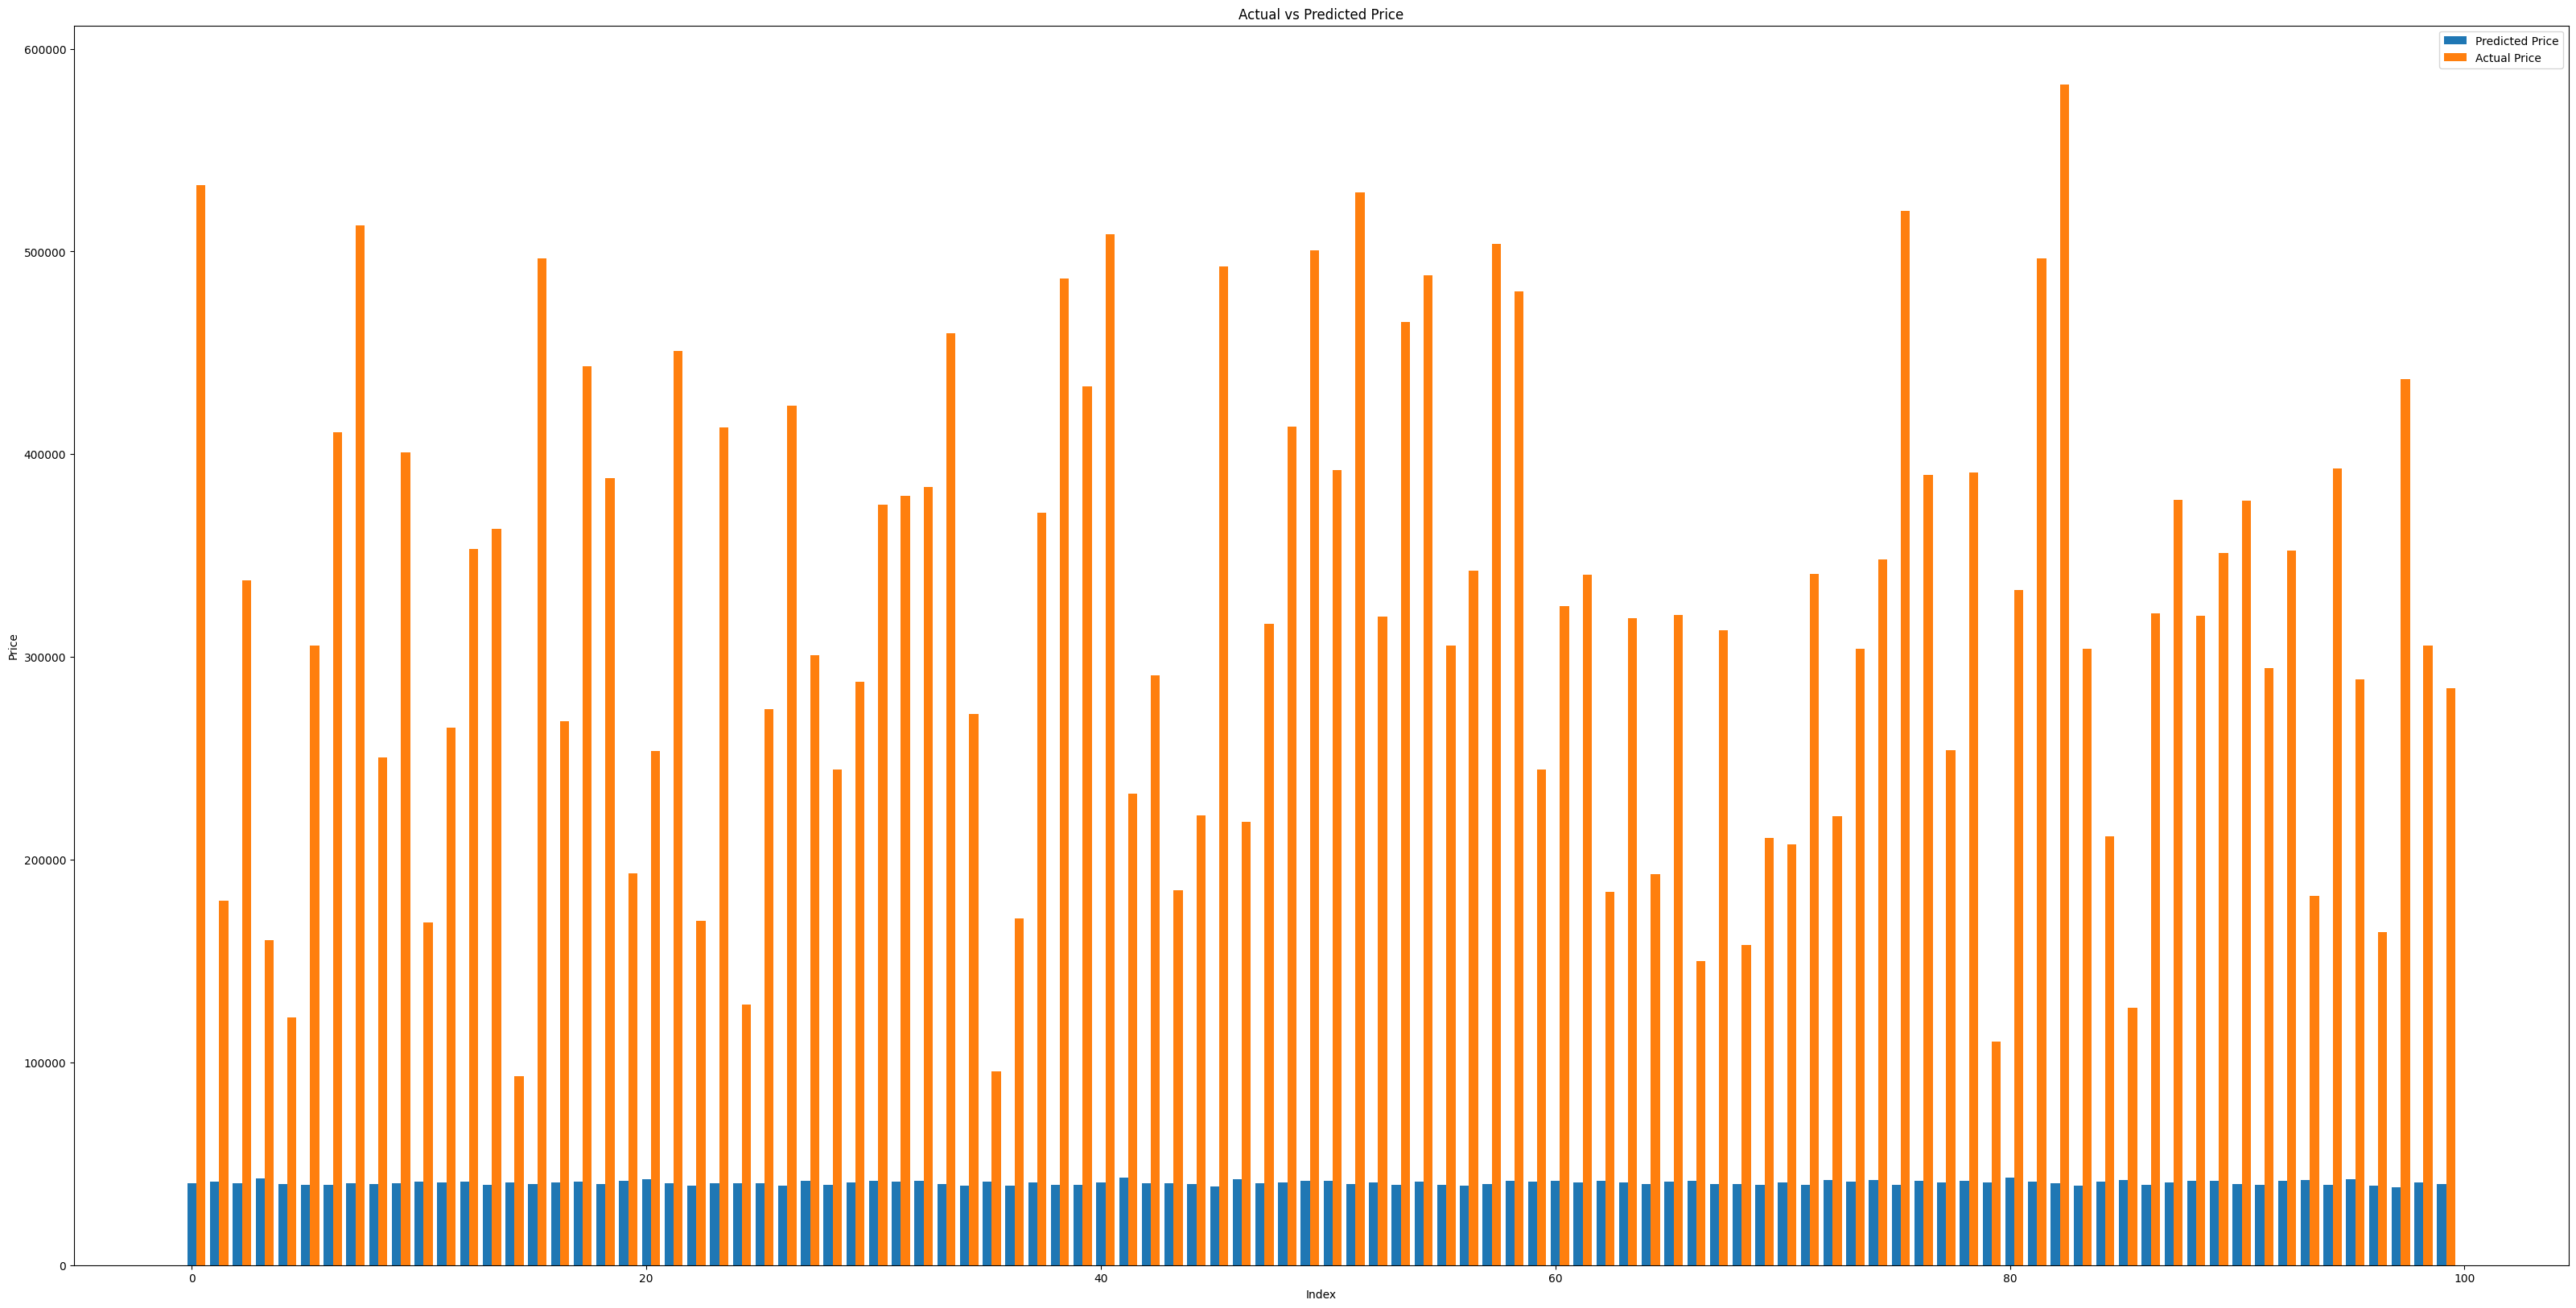

In [58]:
ind=np.arange(len(y_pred))
plt.figure(figsize=(40,20))
width=0.4
plt.bar(ind, y_pred,width, label='Predicted Price')
plt.bar(ind+width, y_true,width, label='Actual Price')
plt.title('Actual vs Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

## Corrective Measures
- add more hidden layers
- Relu activation function instead of sigmoid

In [62]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
    ])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [63]:
model.compile(optimizer=Adam(learning_rate=1.0))

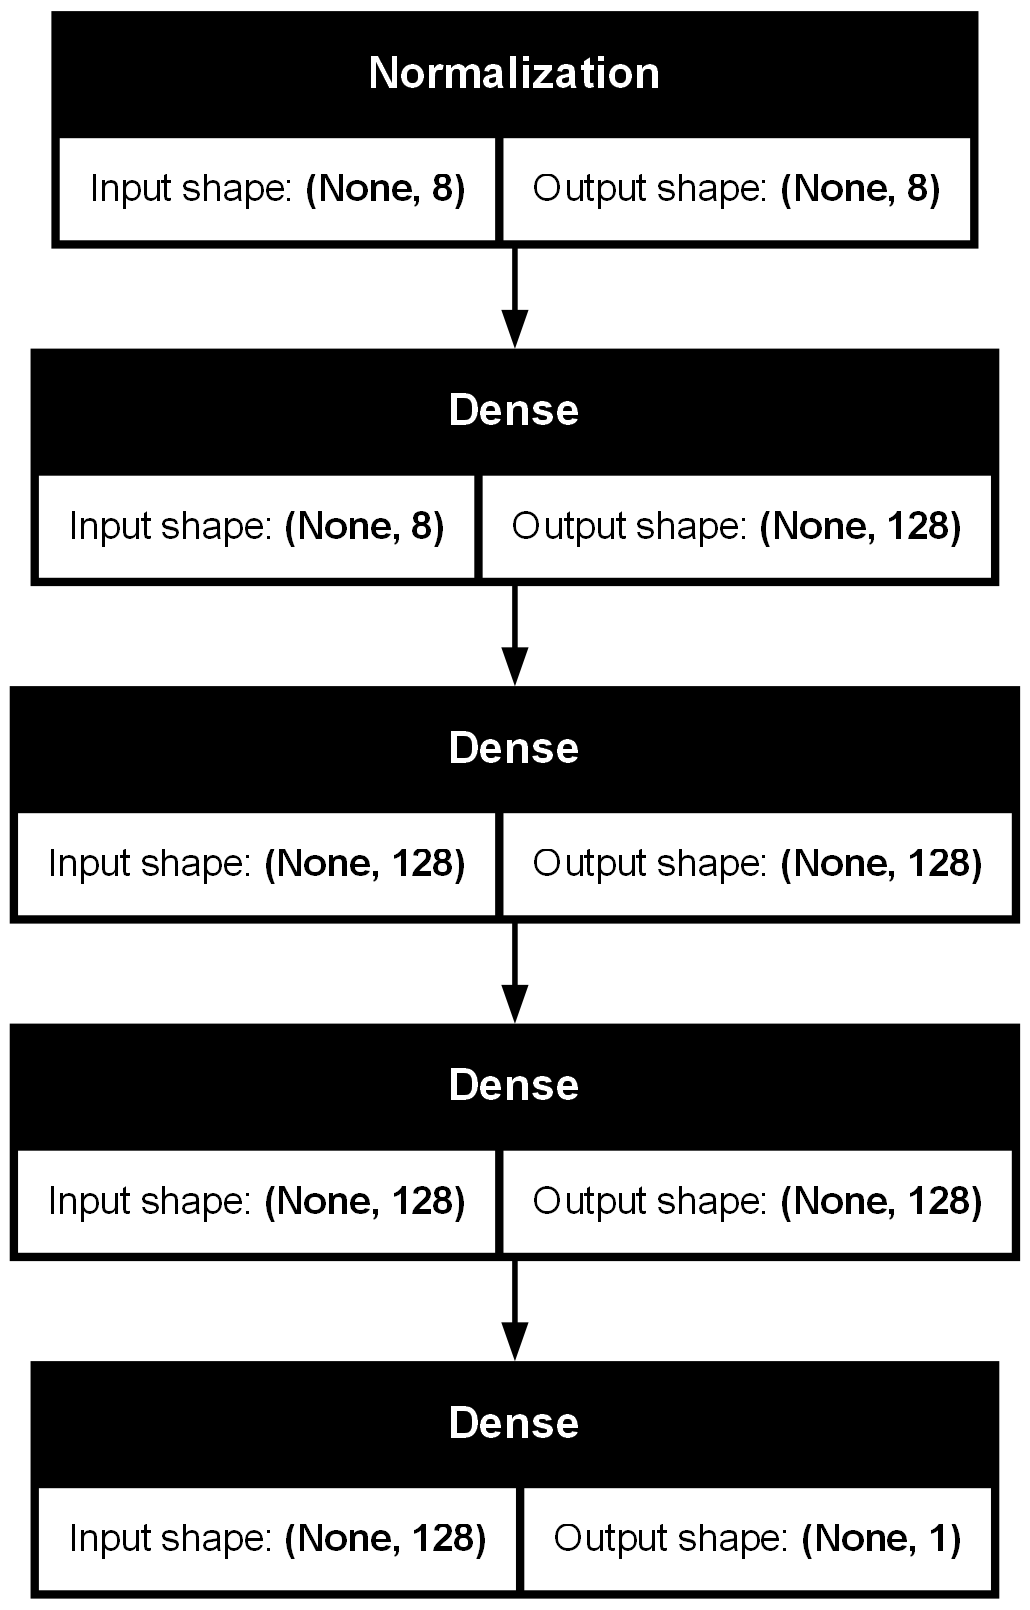

In [64]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [69]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mae',
    metrics=[RootMeanSquaredError()]  # Wrap in a list
)

In [70]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 305643.5312 - root_mean_squared_error: 331016.7188 - val_loss: 311014.1875 - val_root_mean_squared_error: 337869.4375
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 277708.4375 - root_mean_squared_error: 305417.8125 - val_loss: 142630.5000 - val_root_mean_squared_error: 172755.7500
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 96074.7500 - root_mean_squared_error: 119479.0469 - val_loss: 48209.8164 - val_root_mean_squared_error: 60427.1680
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40786.7266 - root_mean_squared_error: 51005.2148 - val_loss: 42597.1250 - val_root_mean_squared_error: 52111.8555
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39209.7656 - root_mean_squared_error: 48714.5898 - val_loss: 41601.1953 - val_root_mean_squared_error: 51601.3047
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 41383.6094 - root_mean_squared_error: 51410.6523 - val_loss:

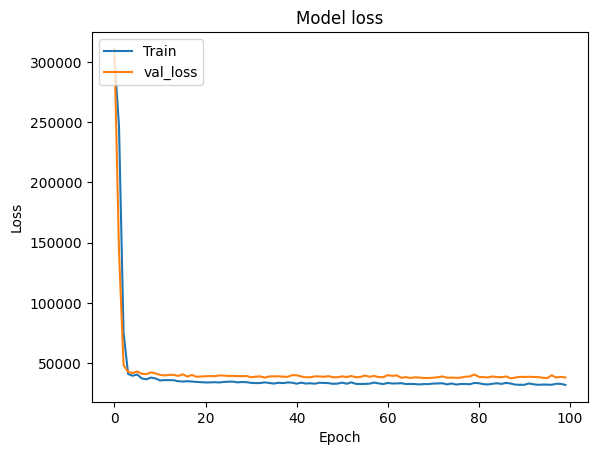

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_loss'], loc='upper left')
plt.show()

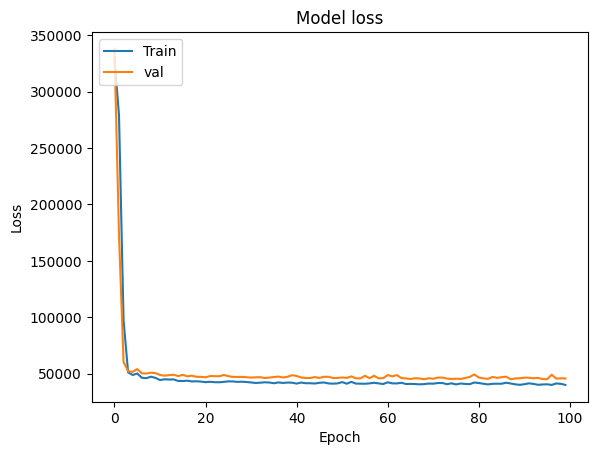

In [72]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [73]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 39110.1406 - root_mean_squared_error: 48726.6406 


[37748.890625, 47103.92578125]

In [74]:
y_true=list(y_test[:,0].numpy())

In [75]:
y_pred=list(model.predict(x_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


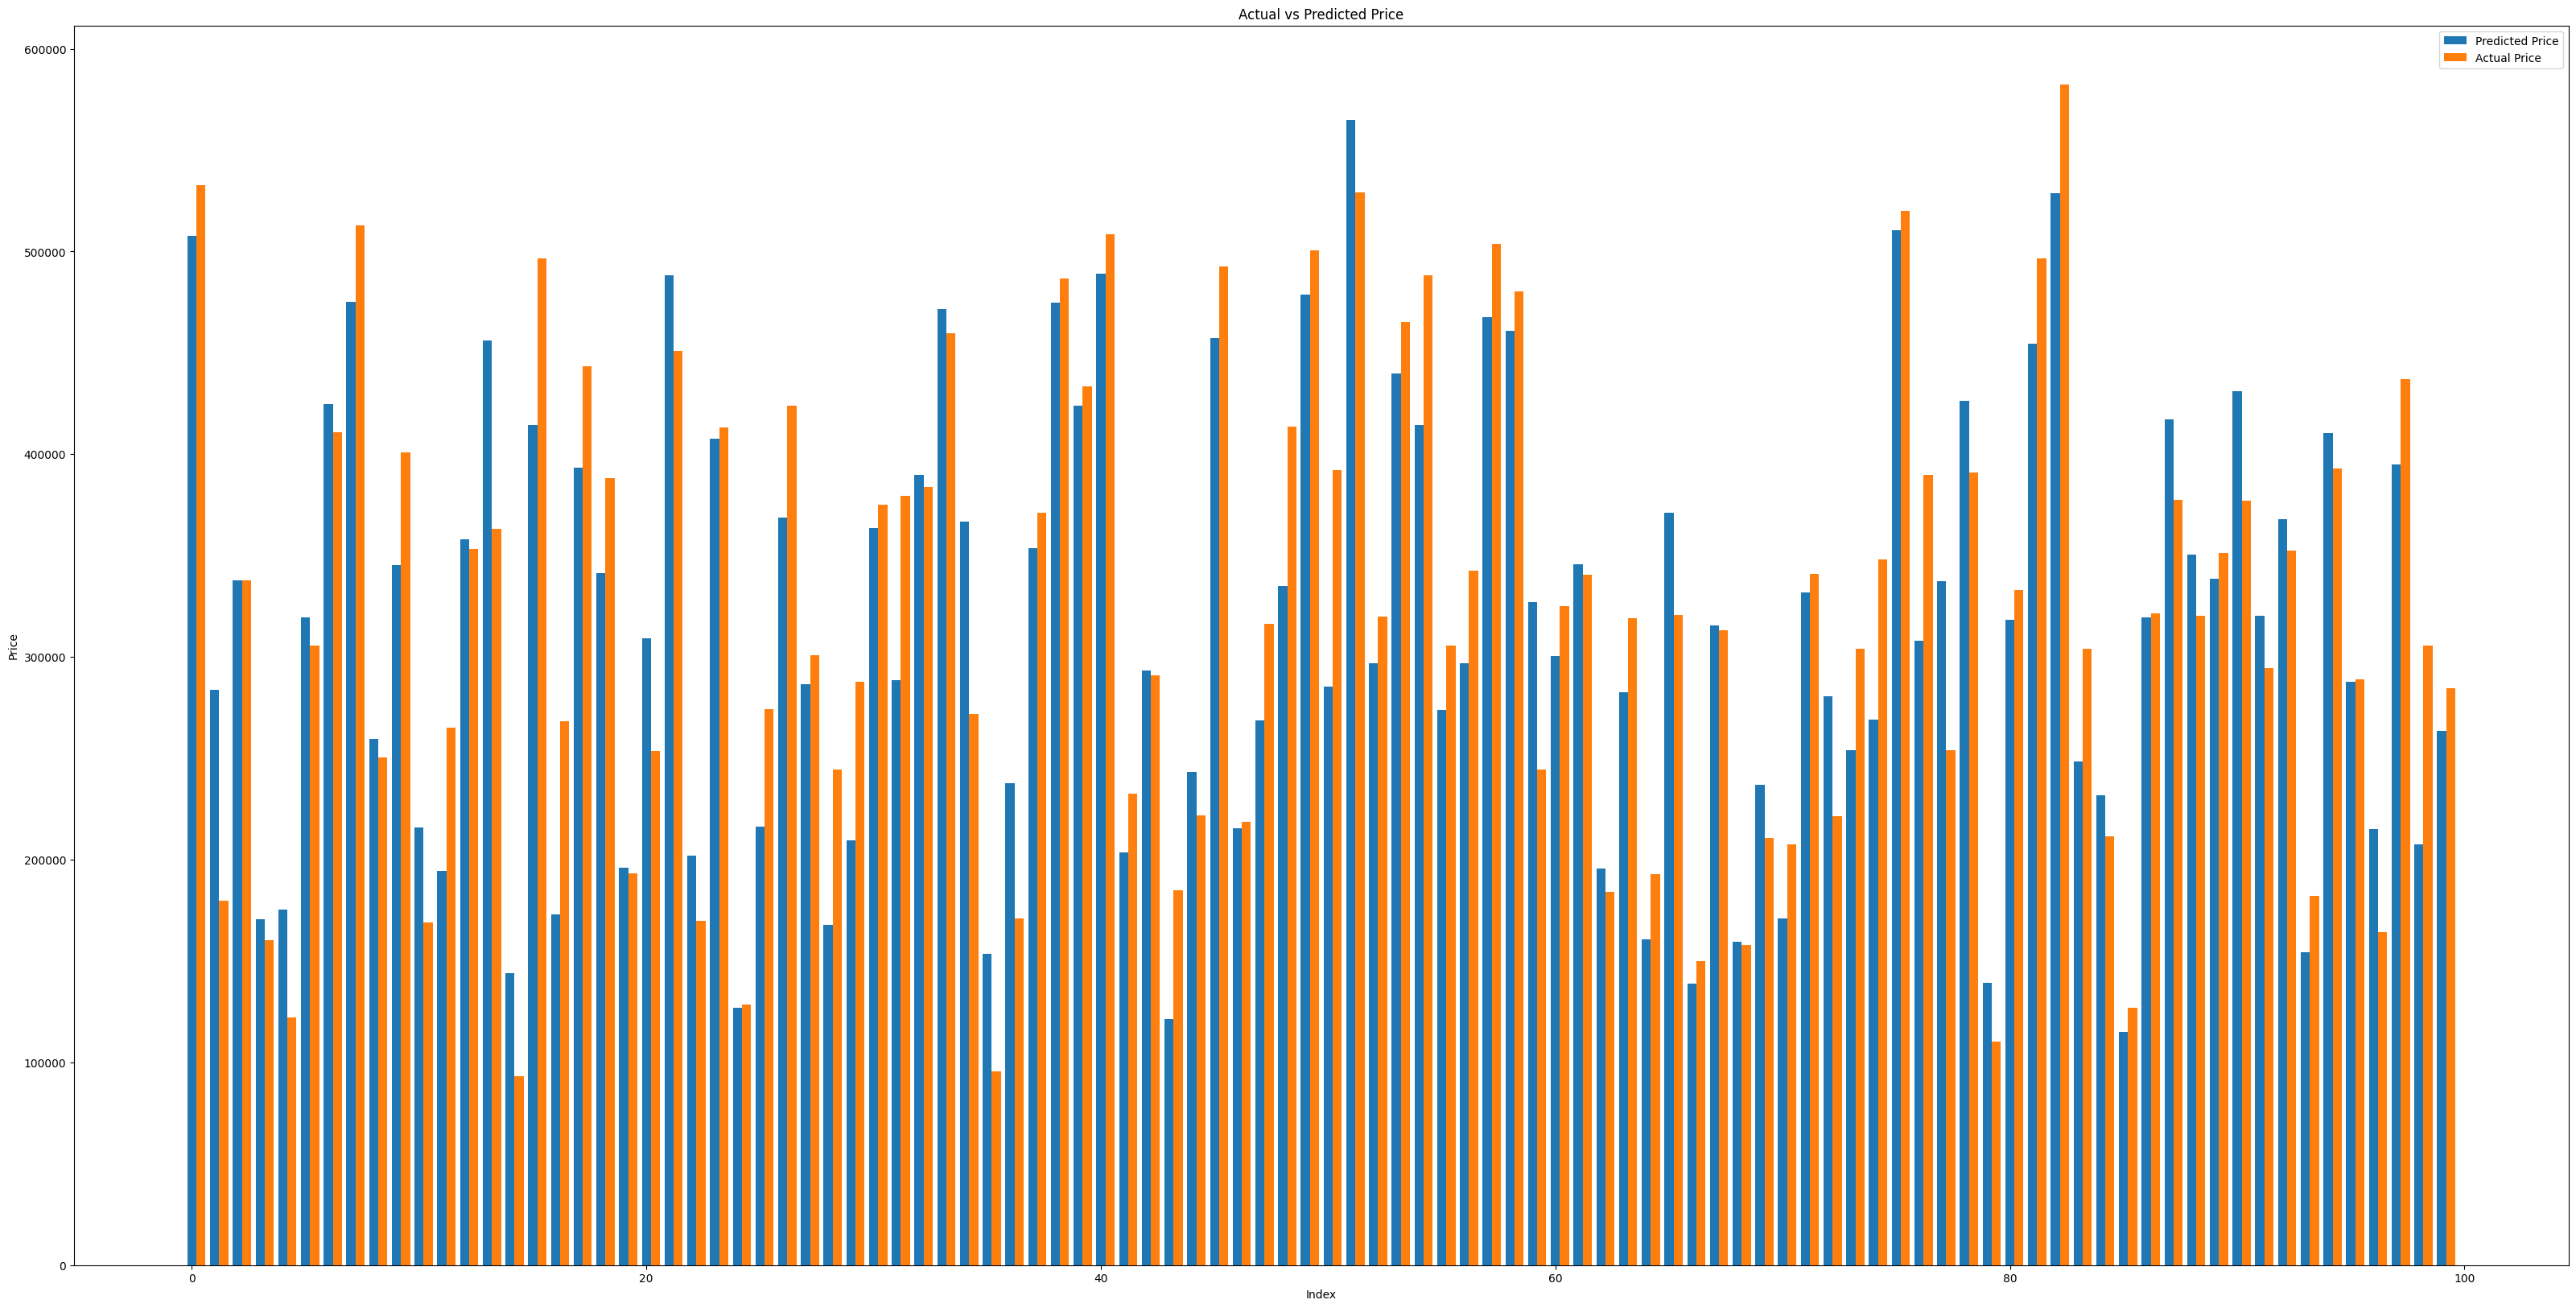

In [77]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))
width = 0.4
plt.bar(ind, y_pred, width, label='Predicted Price')
plt.bar(ind+width, y_true, width, label='Actual Price')
plt.title('Actual vs Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

### Load model faster and efficiently